In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('7Mayis.xlsx', 
                 parse_dates={'dt' : ['Tarih', 'Saat']}, 
                  index_col='dt')

In [3]:
df

,GIP AOF (TL/MWh),PTF (TL/MWh),GOP İşlem Hacmi (TL),Toplam Uretim (MWh),Yenilenebilir Uretim,Demand,PTF (h-1),GIP (h-1),Pozitif dengesizlik(h-1),Negatif dengesizlik(h-1),...,GIP (h-48),PTF (h-72),GIP (h-72),PTF (h-168),GIP (h-168),HOUR,MONTH,DAY,WEEKDAY,Sistem Yönü (h-1)
dt,,,,,,,,,,,,,,,,,,,,,
2016-08-05 00:00:00,133.11,130.00,1373853.00,26456.00,9730.87,27163.45,139.95,130.97,1103.97,-2298.65,...,139.15,210.00,208.37,135.00,25.94,0,5,8,7,0
2016-08-05 01:00:00,120.60,119.96,1244441.05,25360.39,9517.26,25907.86,130.00,133.11,2055.83,-2052.71,...,126.99,189.98,186.92,100.07,50.07,1,5,8,7,1
2016-08-05 02:00:00,64.98,70.00,729582.00,24396.19,9187.93,24907.11,119.96,120.60,2681.53,-2222.97,...,126.99,149.11,148.61,70.00,20.58,2,5,8,7,1
2016-08-05 03:00:00,10.00,0.86,51867.14,23842.12,8849.38,23996.10,70.00,64.98,3308.60,-2351.22,...,10.00,120.78,120.53,0.35,14.00,3,5,8,7,1
2016-08-05 04:00:00,10.00,0.94,52679.34,23675.50,8818.16,23807.93,0.86,10.00,2770.42,-1621.79,...,0.00,113.94,113.31,0.82,12.13,4,5,8,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 19:00:00,341.45,376.71,8704165.31,36999.38,17053.15,37086.90,359.62,348.43,1033.74,-705.26,...,410.06,567.00,573.96,333.81,341.82,19,4,30,5,1
2021-04-30 20:00:00,329.04,372.17,8572423.00,36689.45,16640.49,36778.06,376.71,341.45,864.87,-881.84,...,370.66,567.00,573.62,333.15,339.90,20,4,30,5,0
2021-04-30 21:00:00,338.49,369.02,8475161.80,37122.26,16863.62,37211.94,372.17,329.04,807.51,-564.80,...,361.95,565.98,567.18,331.63,338.85,21,4,30,5,1


In [4]:
y = df["GIP AOF (TL/MWh)"] 


In [5]:
a = ["PTF (TL/MWh)","GOP İşlem Hacmi (TL)","Toplam Uretim (MWh)","PTF (h-1)","GIP (h-1)","PTF (h-2)","GIP (h-2)",
     "PTF (h-3)","GIP (h-3)","Demand","PTF (h-24)","GIP (h-24)","PTF (h-168)","GIP (h-168)"]

In [6]:
X = df[a]
X.head()

,PTF (TL/MWh),GOP İşlem Hacmi (TL),Toplam Uretim (MWh),PTF (h-1),GIP (h-1),PTF (h-2),GIP (h-2),PTF (h-3),GIP (h-3),Demand,PTF (h-24),GIP (h-24),PTF (h-168),GIP (h-168)
dt,,,,,,,,,,,,,,
2016-08-05 00:00:00,130.00,1373853.00,26456.00,139.95,130.97,149.98,147.40,158.78,158.73,27163.45,139.96,138.33,135.00,25.94
2016-08-05 01:00:00,119.96,1244441.05,25360.39,130.00,133.11,139.95,130.97,149.98,147.40,25907.86,139.95,139.71,100.07,50.07
2016-08-05 02:00:00,70.00,729582.00,24396.19,119.96,120.60,130.00,133.11,139.95,130.97,24907.11,128.00,129.23,70.00,20.58
2016-08-05 03:00:00,0.86,51867.14,23842.12,70.00,64.98,119.96,120.60,130.00,133.11,23996.10,5.09,5.10,0.35,14.00
2016-08-05 04:00:00,0.94,52679.34,23675.50,0.86,10.00,70.00,64.98,119.96,120.60,23807.93,5.10,5.10,0.82,12.13


In [7]:
#The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model. 
#We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios 
#from the null model containing only the intercept, to the least squares fit
alphas = 10**np.linspace(5,-2,100)*0.5
alphas

array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743925e+03,
       1.92676430e+03, 1.63727458e+03, 1.39127970e+03, 1.18224471e+03,
       1.00461650e+03, 8.53676324e+02, 7.25414389e+02, 6.16423370e+02,
       5.23807876e+02, 4.45107543e+02, 3.78231664e+02, 3.21403656e+02,
       2.73113861e+02, 2.32079442e+02, 1.97210303e+02, 1.67580133e+02,
       1.42401793e+02, 1.21006413e+02, 1.02825615e+02, 8.73764200e+01,
       7.42484131e+01, 6.30928442e+01, 5.36133611e+01, 4.55581378e+01,
       3.87131841e+01, 3.28966612e+01, 2.79540509e+01, 2.37540508e+01,
       2.01850863e+01, 1.71523464e+01, 1.45752653e+01, 1.23853818e+01,
       1.05245207e+01, 8.94324765e+00, 7.59955541e+00, 6.45774833e+00,
      

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)

In [9]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1,shuffle=False)

Text(0, 0.5, 'weights')

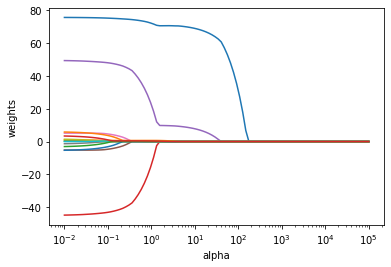

In [10]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [11]:
from sklearn.metrics import mean_absolute_error
lasso2 = Lasso(alpha=100,max_iter = 10000)
lasso2.fit(X_train, y_train)             # Fit a Lasso regression on the training data
pred2 = lasso2.predict(X_test)           # Use this model to predict the test data
lasso2.fit(X_train, y_train)
#print(pd.Series(pred.coef_, index = X.columns)) # Print coefficients
print(mean_absolute_error(y_test, pred2))          # Calculate the test MSE

93.7167712987715


In [12]:
pd.Series(lasso.coef_, index=X.columns)

PTF (TL/MWh)            75.693093
GOP İşlem Hacmi (TL)     0.939949
Toplam Uretim (MWh)      0.224147
PTF (h-1)              -44.869518
GIP (h-1)               49.385248
PTF (h-2)               -5.197321
GIP (h-2)                5.117718
PTF (h-3)               -1.318046
GIP (h-3)                1.394135
Demand                   0.000000
PTF (h-24)              -5.322795
GIP (h-24)               5.803321
PTF (h-168)             -3.056000
GIP (h-168)              3.376681
dtype: float64

In [14]:
np.abs(pd.Series(lasso.coef_, index=X.columns)).sort_values(ascending = False)

PTF (TL/MWh)            75.693093
GIP (h-1)               49.385248
PTF (h-1)               44.869518
GIP (h-24)               5.803321
PTF (h-24)               5.322795
PTF (h-2)                5.197321
GIP (h-2)                5.117718
GIP (h-168)              3.376681
PTF (h-168)              3.056000
GIP (h-3)                1.394135
PTF (h-3)                1.318046
GOP İşlem Hacmi (TL)     0.939949
Toplam Uretim (MWh)      0.224147
Demand                   0.000000
dtype: float64